# Basic statistics for web_pages.csv file

We are here using the SOPA and PIPA protests files, that can be downloaded from Archive-It (internet archive). If you wish to know more about the [SOPA and PIPA protests](https://en.wikipedia.org/wiki/Protests_against_SOPA_and_PIPA).

Part of the code here [is based on the AUT notebooks (Licence Apache 2.0)](https://github.com/archivesunleashed/notebooks/tree/main/arch).

This code should be compatible with macOS and all linux flavors.

# Let's get and unzip the data

We download the CSV files. Do this only once.

In [1]:
%%capture

!mkdir data

!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/AudioInformationExtraction/audio-information.csv.gz?access=ZJP74KT337WMAA2TNCJCHAR76DY3WZ3I" --output data/audio-information.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/DomainFrequencyExtraction/domain-frequency.csv.gz?access=BHM4IKLW3667CFJDU4V4XS7SR73DZLL5" --output data/domain-frequency.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/DomainGraphExtraction/domain-graph.csv.gz?access=2IVO6S2IKMFOCBD4CHS3HWN4LKZT24X2" --output data/domain-graph.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/ImageGraphExtraction/image-graph.csv.gz?access=VWXA5UO6KMHEZRH56JXPUUY3K5GZA3TS" --output data/image-graph.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/ImageInformationExtraction/image-information.csv.gz?access=2MB7PP3OYXRMTEO2QZ7QCJTIBIPR5X5V" --output data/image-information.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/PdfInformationExtraction/pdf-information.csv.gz?access=OF7MAJJ7EVVG5AOLFTM7DIXSJD47LUEU" --output data/pdf-information.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/PresentationProgramInformationExtraction/powerpoint-information.csv.gz?access=BSP2YEXPMDPOUQCKG6U3IN2HCWK5ZPBC" --output data/powerpoint-information.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/SpreadsheetInformationExtraction/spreadsheet-information.csv.gz?access=UY6EPKCOWIR7F22AJC23BY4FNHHIKR5K" --output data/spreadsheet-information.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/VideoInformationExtraction/video-information.csv.gz?access=2KVSJCA3MDKQNTQLPLINY7S6SWOQKMI7" --output data/video-information.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/WebGraphExtraction/web-graph.csv.gz?access=AANYG7WRSKFQ4DCCLIAGZQLX2NQYQJW5" --output data/web-graph.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/WebPagesExtraction/web-pages.csv.gz?access=XSRVJF5RE4ORH466KC2364F5SHG76QQO" --output data/web-pages.csv.gz
!curl "https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-03010/WordProcessorInformationExtraction/word-document-information.csv.gz?access=5MZLAMLHG5MPD2JYFPXIEZXMX3SCRWZD" --output data/word-document-information.csv.gz

We unzip them

In [2]:
!gunzip data/*

We verify that everything's there

In [3]:
!ls -1 data

audio-information.csv
domain-frequency.csv
domain-graph.csv
image-graph.csv
image-information.csv
pdf-information.csv
powerpoint-information.csv
spreadsheet-information.csv
video-information.csv
web-graph.csv
web-pages.csv
word-document-information.csv


# Libraries to load

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

# Let's start the pivot tables (rather group_by)

## Loading of web_pages.csv as dataframe

In [5]:
#web_pages =  pd.read_csv('data/web-pages.csv', nrows=1000) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
web_pages =  pd.read_csv('data/web-pages.csv')
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20120118,amazon.com,http://rcm.amazon.com/e/cm?lt1=_blank&bc1=0000...,text/html,NaN,NaN,NaN
1,20120118,feedburner.com,http://feeds.feedburner.com/QuoteSnack,text/html,text/html,en,"Stop SOPA! If Congress passes SOPA, the Intern..."
2,20120118,thedeadcrows.com,http://thedeadcrows.com/sopa.html,text/html,application/xhtml+xml,en,STOP SOPA! STOP SOPA! STOP SOPA! This site has...
3,20120118,youtube.com,http://www.youtube.com/embed/WU_gZNVfuf0?wmode...,text/html,text/html,en,Life in a Day Soundtrack - Angolan Women - You...
4,20120118,selectivism.com,http://selectivism.com/2010/02/,text/html,application/xhtml+xml,en,2010 February : Selectivism ABOUT TIP-OFF CON...
...,...,...,...,...,...,...,...
219987,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219988,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219989,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/0.8,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219990,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/form.new...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...


## Count number of harvesting by day

In [6]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_count_byCrawlDate = web_pages.groupby(['crawl_date']).size()
# web_pages_count_byCrawlDate.to_csv('generated/web_pages_count_byCrawlDate.csv')
web_pages_count_byCrawlDate

crawl_date
20120118    131856
20120119     88136
dtype: int64

Text(0, 0.5, 'Count')

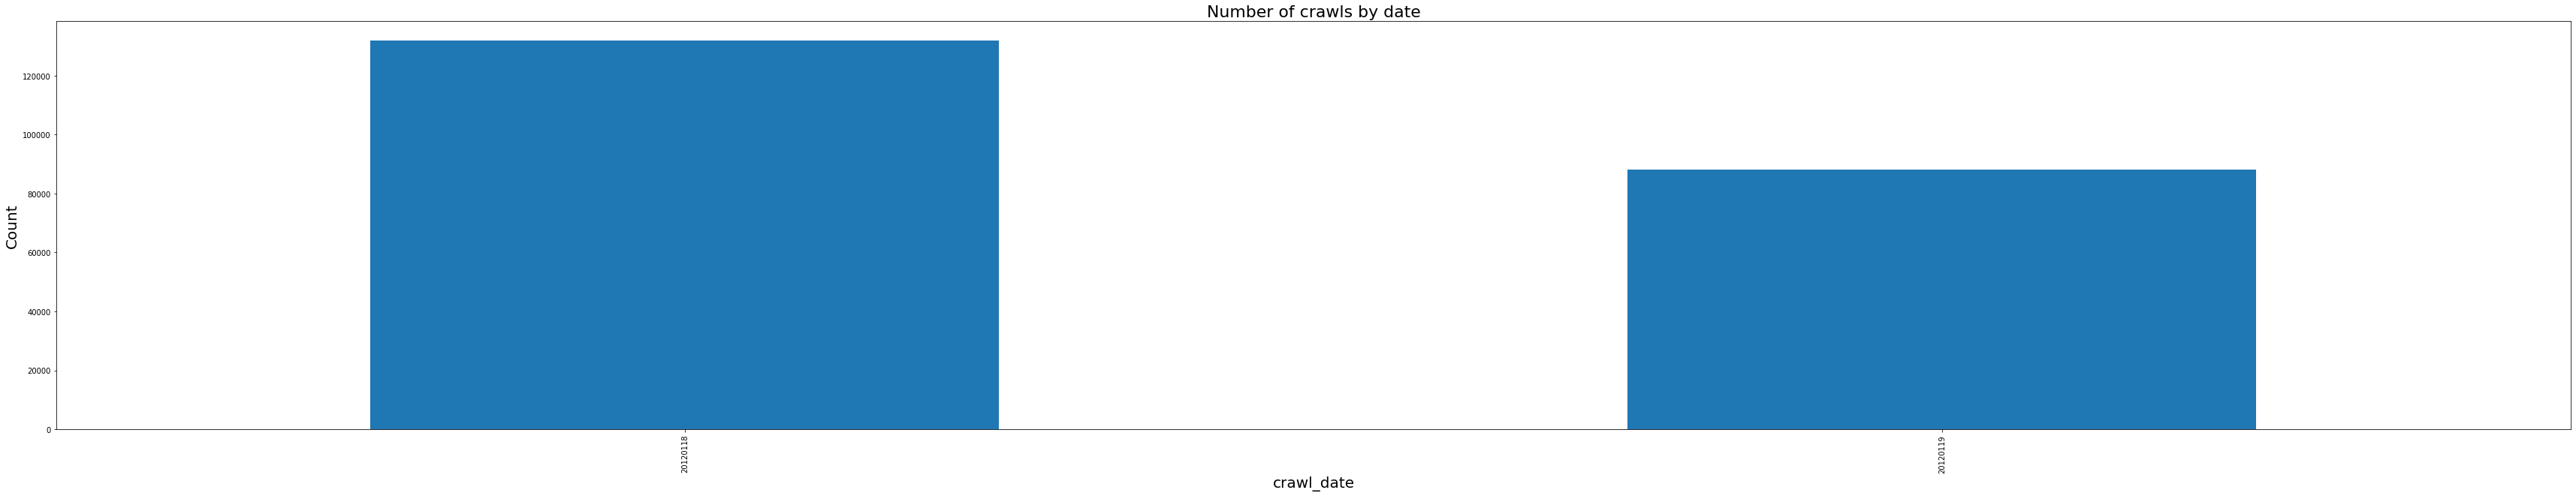

In [7]:
#pd.read_csv('generated/web_pages_count_byCrawlDate.csv')
#plt.plot('0','crawl_date')
web_pages_count_byCrawlDate_chart = web_pages_count_byCrawlDate.plot.bar(figsize=(60, 10))

web_pages_count_byCrawlDate_chart.set_title("Number of crawls by date", fontsize=22)
web_pages_count_byCrawlDate_chart.set_xlabel("crawl_date", fontsize=20)
web_pages_count_byCrawlDate_chart.set_ylabel("Count", fontsize=20)

#initial code for this graph by Nick Ruest

## Domain frequency

In [8]:
web_pages_count_byDomain = web_pages.groupby(['domain']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

domain
jcink.com            128720
eff.org               23282
tumblr.com             5769
youtube.com            4611
google.com             3028
                      ...  
shankman.com              1
depontevedra.es           1
dentalplat.com            1
denniskirk.com            1
doritosandmax.com         1
Length: 5373, dtype: int64

In [9]:
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

,domain,0
0,jcink.com,128720
1,eff.org,23282
2,tumblr.com,5769
3,youtube.com,4611
4,google.com,3028
...,...,...
5368,shankman.com,1
5369,depontevedra.es,1
5370,dentalplat.com,1
5371,denniskirk.com,1


In [ ]:
#just to know: the median
web_pages_count_byDomain_median = web_pages_count_byDomain["0"].median()
web_pages_count_byDomain_median

In [ ]:
#just to know: mean
web_pages_count_byDomain_mean = web_pages_count_byDomain["0"].mean()
web_pages_count_byDomain_mean

Text(0, 0.5, 'Count')

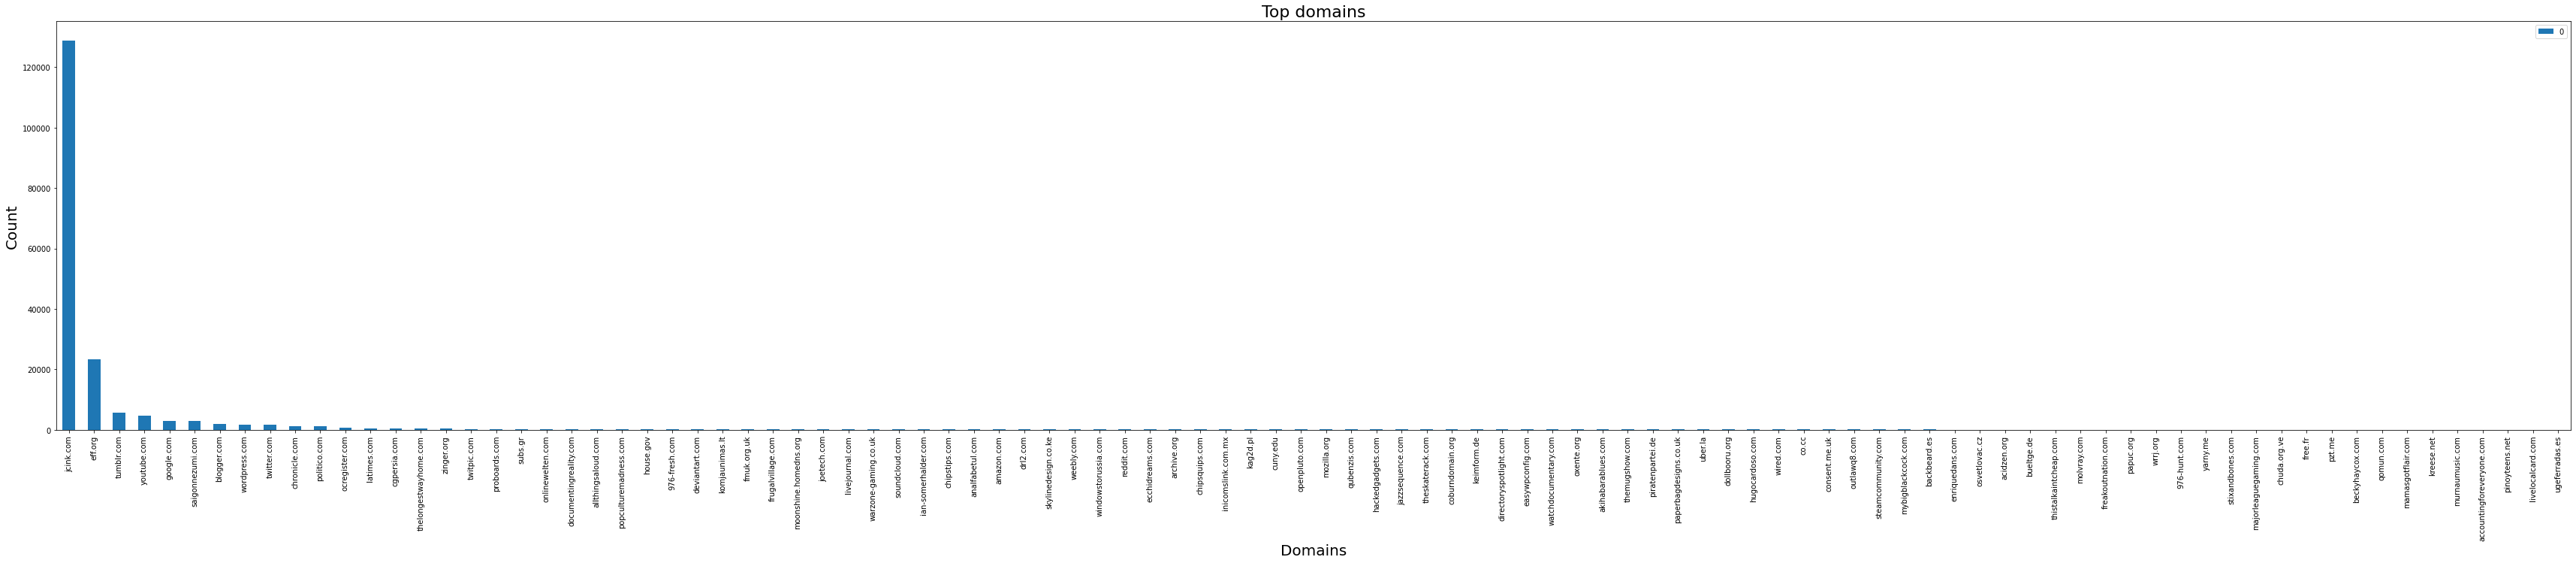

In [14]:
topDomain = web_pages_count_byDomain.sort_values("0", ascending=False).head(100)

topDomain_chart = topDomain.plot.bar(figsize=(60, 10), x="domain")

topDomain_chart.set_title("Top domains", fontsize=22)
topDomain_chart.set_xlabel("Domains", fontsize=20)
topDomain_chart.set_ylabel("Count", fontsize=20)

In [15]:
# looking at Twitter crawls

# we create a mask
twitter_crawls_mask = web_pages["domain"] == 'twitter.com'
# we apply the mask to web_pages, so that we have only the lines with twitter.com
twitter_crawls = web_pages[twitter_crawls_mask]
# we group by crawl_date
twitter_crawls_by = twitter_crawls.groupby(['crawl_date']).size()
twitter_crawls_by.to_csv('data/twitter_crawls_by.csv')
twitter_crawls_by

crawl_date
20120118    1526
20120119     147
dtype: int64

Text(0, 0.5, 'Count')

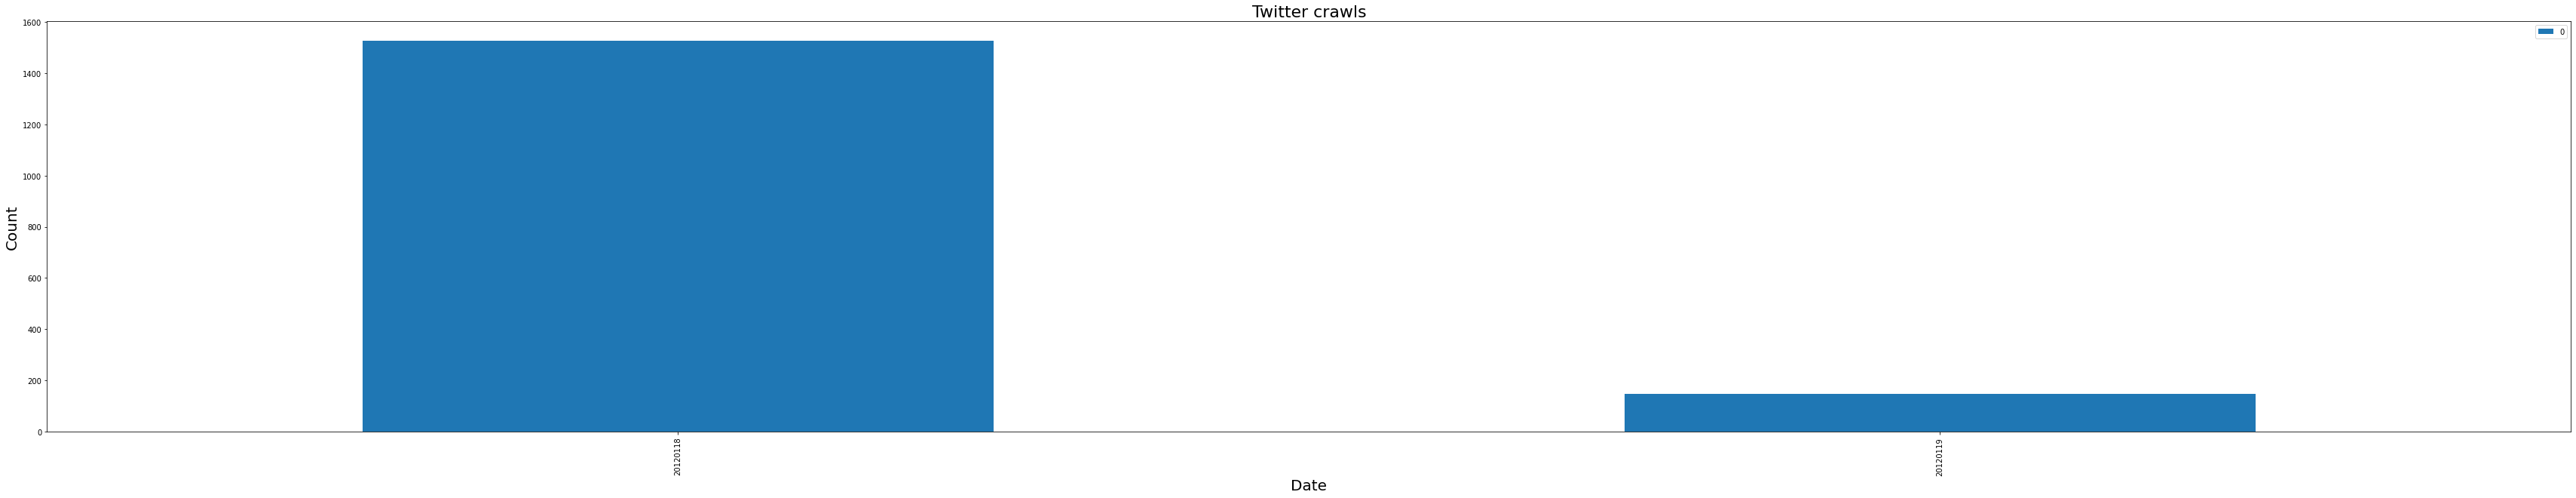

In [16]:
# And now visualize it

twitter_crawls_by = pd.read_csv('data/twitter_crawls_by.csv')

twitter_chart = twitter_crawls_by.plot.bar(figsize=(60, 10), x="crawl_date")

twitter_chart.set_title("Twitter crawls", fontsize=22)
twitter_chart.set_xlabel("Date", fontsize=20)
twitter_chart.set_ylabel("Count", fontsize=20)

In [ ]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_byCrawlDate_byLanguage = web_pages.groupby(['language','crawl_date']).size()
web_pages_byCrawlDate_byLanguage.to_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage

In [11]:
web_pages_byCrawlDate_byLanguage = pd.read_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage



,language,crawl_date,0
0,af,20120118,36
1,af,20120119,2
2,an,20120118,12
3,an,20120119,1
4,ar,20120118,33
...,...,...,...
83,tr,20120119,2
84,uk,20120118,2
85,vi,20120118,77
86,vi,20120119,3
